# Predict California Housing price

## Import libraries and packages

In [ ]:
import numpy as np

import pandas as pd
# adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# set appropriate tensorflow version
%tensorflow_version 2.x
import tensorflow as tf
tf.keras.backend.set_floatx('float32')

from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

print("Imported the modules.")

Imported the modules.


## Get Data
  
* **Load** the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).
  * train_df: training set
  * test_df: test set
* **Scale** the label *median_house_value* to a more human-friendly range.
* **Shuffle** the training examples.

In [ ]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
train_df["median_house_value"] /= scale_factor 
test_df["median_house_value"] /= scale_factor

# Shuffle the training examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

## Preprocess: Data Representation 

Represent feature columns - *single feature*, *single feature cross*, or *single synthetic feature* in the desired way:
  * As floating-point values: [`tf.feature_column.numeric_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column). 
  * As a series of buckets or bins: [`tf.feature_column.bucketized_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column).
  * Assemble the created representations into a list or array. 


## Define required functions
* *create_model*: builds a linear regression model that uses the feature representations for traning.
* *train_model*: trains the model.
* *plot_loss*: generates the loss curve.

In [ ]:
def create_model(lr, features):
  # sequential layering
  model = tf.keras.models.Sequential() 
  # layers
  model.add(features) # feature columns
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # linear regression
  # compiling
  model.compile(
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()],
      optimizer=tf.keras.optimizers.RMSprop(lr=lr)
  )
  return model           

def train_model(model, dataset, epochs, batch_size, label_column):
  # creast the dataset dictionary
  features = {name:np.array(value) for name, value in dataset.items()} 
  # extract the label column
  label = np.array(features.pop(label_column))
  # train the model
  history = model.fit(
      x=features, 
      y=label, 
      batch_size=batch_size,
      epochs=epochs, 
      shuffle=True
  )
  # list of epochs
  epochs = history.epoch
  # mean absolute error for each epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return epochs, rmse   

def plot_loss(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined functions.")

Defined functions.


## Task 1: Represent *latitude* and *longitude* as **Floating point numbers**

* Convert to *floating-point* using `tf.feature_column.numeric_column`

Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 19133.5999 - root_mean_squared_error: 136.7634
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13658.9249 - root_mean_squared_error: 116.8685
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13283.1258 - root_mean_squared_error: 115.2291
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13509.4472 - root_mean_squared_error: 116.2182
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13312.6627 - root_mean_squared_error: 115.3701
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13201.8261 - root_mean_squared_error: 114.8966
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13414.3300 - root_mean_squared_error: 115.8153
Epoch 8/30
170/170 [=======================

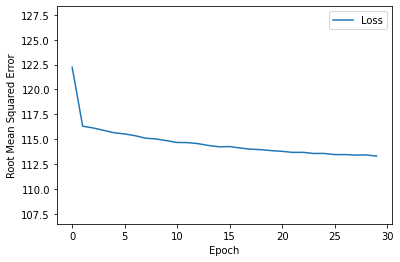

Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 12279.2734 - root_mean_squared_error: 110.8119


[12279.2734375, 110.81188201904297]

In [ ]:
# Feature representation: floating-point

# To Floating-point
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")

# Create layer for the model
feature_columns = []
feature_columns.append(latitude)
feature_columns.append(longitude)
fp_feature_layer = layers.DenseFeatures(feature_columns)

# Set Hyperparameters
lr = 0.05
epochs = 30
batch_size = 100

label_column='median_house_value'

# Build the model passing in the fp_feature_layer
my_model = create_model(lr, fp_feature_layer)

# Train the Model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_column)

# Plot the loss curve
plot_loss(epochs, rmse)

# Evaluate the model
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_column))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

**Floating-point representation** gives a **high RMSE**. Not a good representation.

## Task 2: Represent *latitude* and *longitude* in **Buckets**

**Floating-point** values are **not a good way to represent latitude and longitude** as they do not have much predictive power. We're only using the raw values to establish a baseline for future experiments with better representations.

Represents latitude and longitude in **buckets (bins)**, each representing all the neighborhoods within a single degree. 
* Convert to *floating-point* using `tf.feature_column.numeric_column`
* Creates *buckets* using `tf.feature_column.bucketized_column`  

The model will **learn a separate weight for each bucket**. 


 


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 53484.2362 - root_mean_squared_error: 231.2332
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 43989.0109 - root_mean_squared_error: 209.7197
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 36133.3068 - root_mean_squared_error: 190.0558
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 29163.9984 - root_mean_squared_error: 170.7483
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 23445.8498 - root_mean_squared_error: 153.1083
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 19460.3809 - root_mean_squared_error: 139.4593
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 16336.0656 - root_mean_squared_error: 127.7524
Epoch 8/30
170/170 [=======================

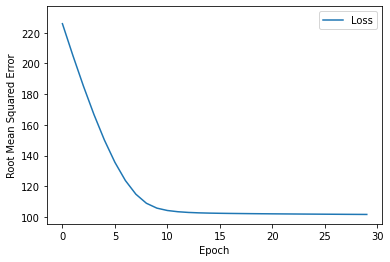

Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 10182.8867 - root_mean_squared_error: 100.9103


[10182.88671875, 100.91029357910156]

In [ ]:
# Feature representation: buckets

# To Floating-point
latitude_numeric = tf.feature_column.numeric_column("latitude") 
longitude_numeric = tf.feature_column.numeric_column("longitude")

# To Buckets
resolution_in_degrees = 1.0
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_numeric, latitude_boundaries) # To
longitude = tf.feature_column.bucketized_column(longitude_numeric, longitude_boundaries)

# Create layer for the model
feature_columns = []                                              
feature_columns.append(latitude)
feature_columns.append(longitude)
buckets_feature_layer = layers.DenseFeatures(feature_columns)

# Set Hyperparameters
lr = 0.05
epochs = 30
batch_size = 100

label_column = 'median_house_value'

# Build the model passing in the buckets_feature_layer
my_model = create_model(lr, buckets_feature_layer)
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_column)
plot_loss(epochs, rmse)

# Evaluate the Model
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_column))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

**Bucket representation outperformed floating-point representations**. Still **high RMSE**

## Task 3: Represent *location* as a **Feature Cross** of bucket representations

**Buckets** are a **big improvement over floating-point values**. 

**Real-world locations**, however, exist in **two dimension**. Therefore, you should represent location as a **two-dimensional feature cross**. 

**Cross** the 10 or so latitude buckets with the 10 or so longitude buckets to **create a grid** of 100 cells. 
 
* Convert to *floating-point* using `tf.feature_column.numeric_column`
* Creates *buckets* using `tf.feature_column.bucketized_column`
* *Cross* the buckets using `tf.feature_column.crossed_column`

The model will **learn separate weights for each of the crosses**.

Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 54272.4097 - root_mean_squared_error: 232.9493
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 48295.8581 - root_mean_squared_error: 219.7549
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 41835.1604 - root_mean_squared_error: 204.5273
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 37936.9353 - root_mean_squared_error: 194.7309
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 32563.9654 - root_mean_squared_error: 180.4287
Epoch 6/30
170/170 [==============================] - 0s 3ms/step - loss: 28620.6613 - root_mean_squared_error: 169.1495
Epoch 7/30
170/170 [==============================] - 0s 3ms/step - loss: 24721.5643 - root_mean_squared_error: 157.2062
Epoch 8/30
170/170 [=======================

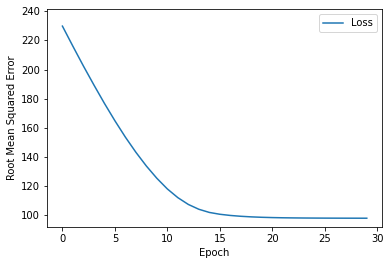

Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 9520.7334 - root_mean_squared_error: 97.5742


[9520.7333984375, 97.57424926757812]

In [ ]:
# Feature represntation: Cross 

# To Floating-poinbt
latitude_numeric = tf.feature_column.numeric_column("latitude")
longitude_numeric = tf.feature_column.numeric_column("longitude")

# To Buckets
resolution_in_degrees = 1.0
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_numeric, latitude_boundaries)
longitude = tf.feature_column.bucketized_column(longitude_numeric, longitude_boundaries)

# Feature Cross
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)

# Convert the crossed feature into a layer to be fed into the model. 
feature_columns = []
feature_columns.append(crossed_feature)
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

# Set Hyperparameters
lr = 0.05
epochs = 30
batch_size = 100

label_column = 'median_house_value'

# Build the model passing in the feature_cross_feature_layer
my_model = create_model(lr, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_column)

plot_loss(epochs, rmse)

# Evaluate the Model
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_column))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

**Feature cross reprentation produced much lower loss than bucket represntation**

## Experimentation: Adjust the **resolution of the feature cross**

`resolution_in_degrees` is set to 1.0. Therefore, each cell represents an area of 1.0 degree of latitude by 1.0 degree of longitude, which corresponds to a cell of 110 km by 90 km. This resolution defines a rather **large neighborhood**. 

Experiment with `resolution_in_degrees`.

### Exp 1. What value of `resolution_in_degrees` produces the best results (lowest loss value)?

A **resolution of ~0.4 degree** provides the best results.

### Exp 2. Why does loss increase when the value of `resolution_in_degrees` drops below a certain value?

**Below ~0.4 degree**, loss increases because **the dataset does not contain enough examples in each cell** to accurately predict prices for those cells.

### Exp 3. What feature (that does not exist in the California Housing Dataset) would be a better proxy for location than latitude X longitude.

***Postal code*** would be a **far better feature** than latitude X longitude, assuming that the dataset contained **sufficient examples in each postal code**.
